In [97]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [119]:
data_path = r"C:\Users\sara\Desktop\Mall_Customers.csv"
data = pd.read_csv(data_path)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [121]:
data.describe()



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [122]:
# Check for missing values
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [123]:
# Assuming 'Annual Income (k$)' is the correct name
data['Annual Income (Normalized)'] = scaler.fit_transform(data[['Annual Income (k$)']])


In [124]:
# Convert Gender from categorical to numerical using label encoding
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Display the updated dataset
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Annual Income (Normalized)  
0                   -1.738999  
1                   -1.738999  
2                   -1.700830  
3                   -1.700830  
4                   -1.662660  


In [125]:
# Convert Gender using one-hot encoding
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Display the updated dataset
print(data.head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1   19                  15                      39   
1           2   21                  15                      81   
2           3   20                  16                       6   
3           4   23                  16                      77   
4           5   31                  17                      40   

   Annual Income (Normalized)  Gender_1  
0                   -1.738999     False  
1                   -1.738999     False  
2                   -1.700830      True  
3                   -1.700830      True  
4                   -1.662660      True  


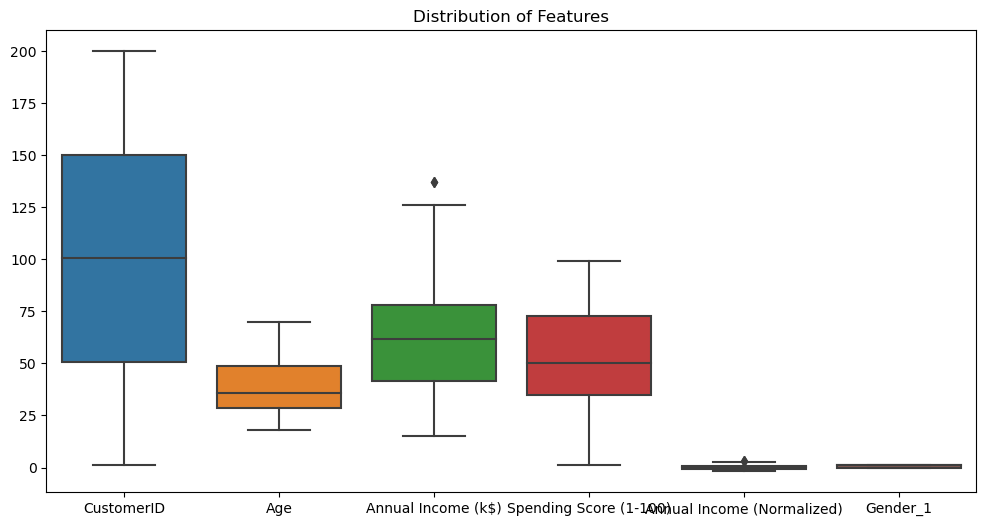

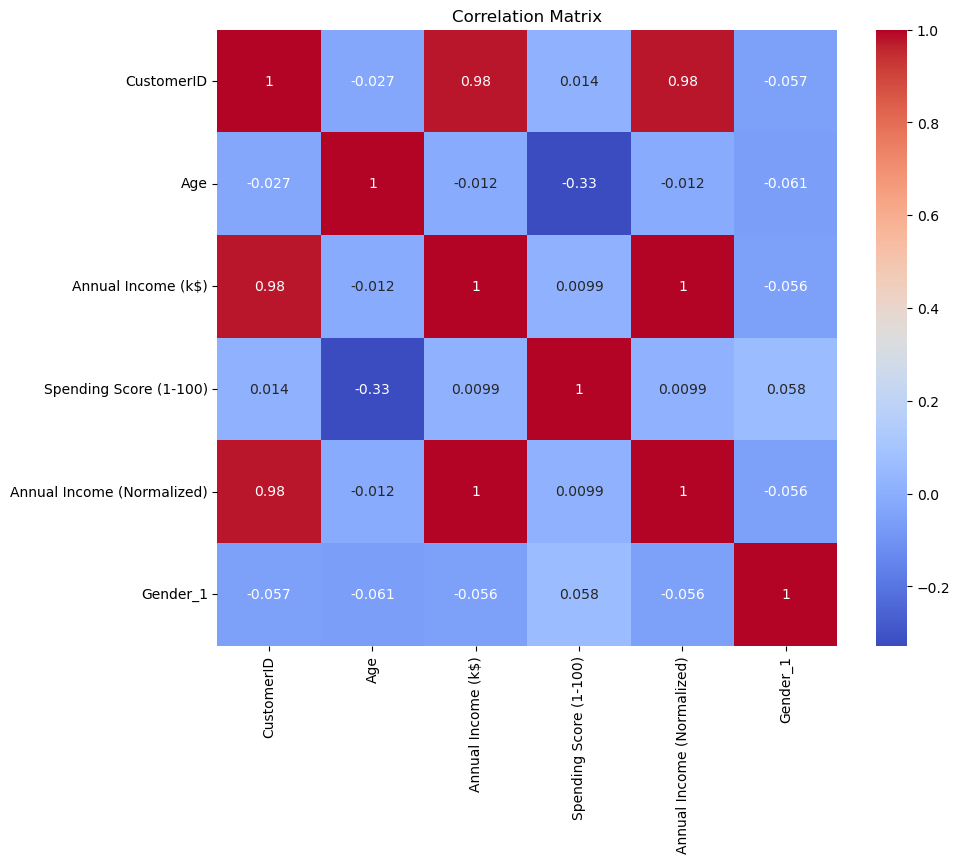

In [126]:
# Visualize distributions of the numerical features
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.title("Distribution of Features")
plt.show()

# Checking the correlation between features
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


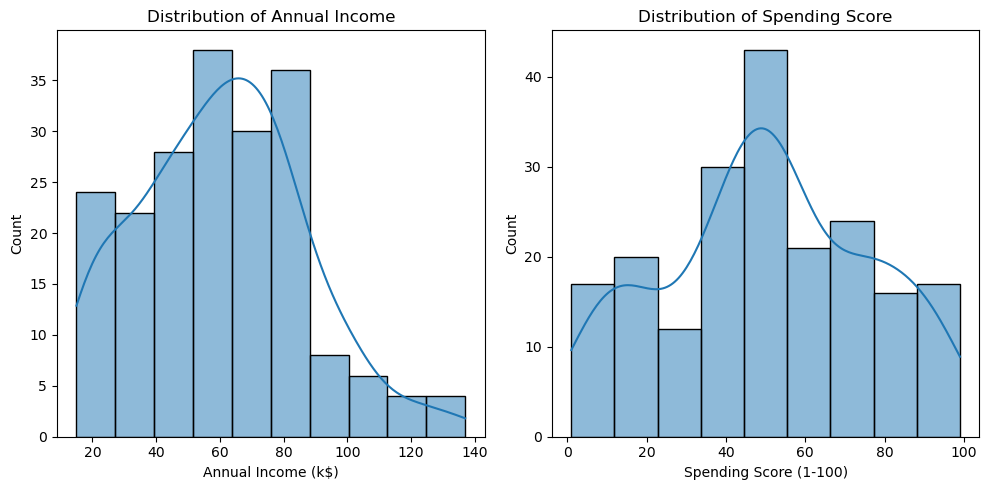

In [127]:
# Plot histograms for features like Annual Income and Spending Score
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()


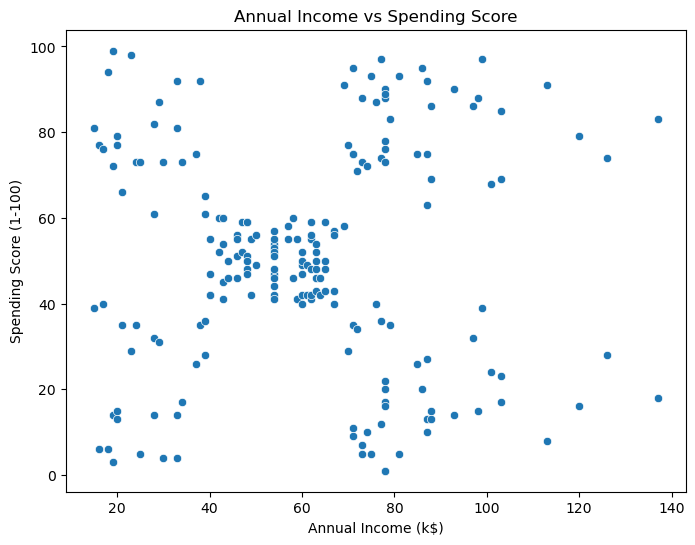

In [128]:
# Scatterplot between key features like Annual Income and Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Annual Income vs Spending Score')
plt.show()


In [129]:
# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Convert the scaled data into a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
data_scaled.head()


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


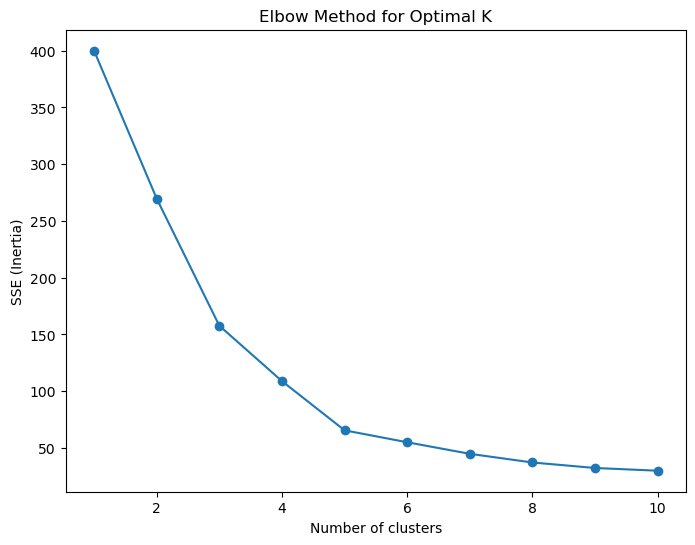

In [130]:
# Elbow method to find optimal number of clusters
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.show()


In [131]:
# Applying KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Display the first few rows of the data with cluster labels
data.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Annual Income (Normalized),Gender_1,Cluster
0,1,19,15,39,-1.738999,False,4
1,2,21,15,81,-1.738999,False,2
2,3,20,16,6,-1.700830,True,4
3,4,23,16,77,-1.700830,True,2
4,5,31,17,40,-1.662660,True,4


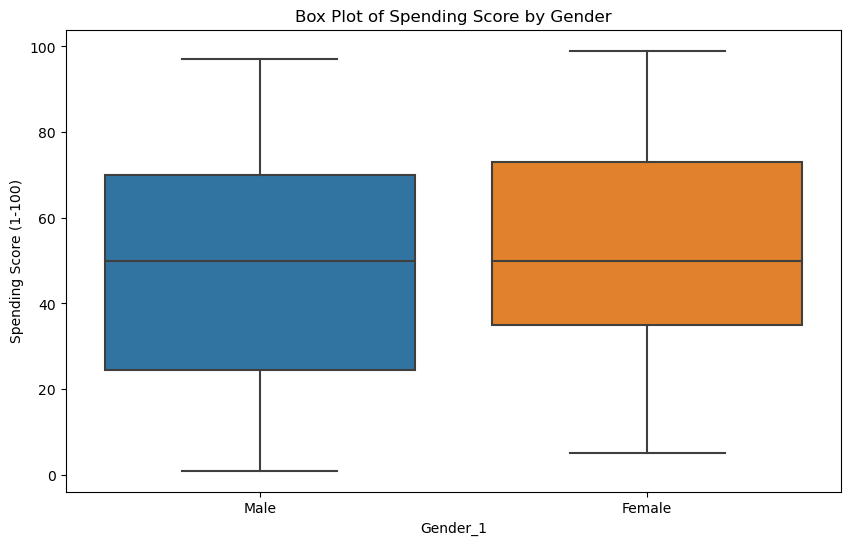

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_1', y='Spending Score (1-100)', data=data)
plt.title('Box Plot of Spending Score by Gender')
plt.xlabel('Gender_1')
plt.ylabel('Spending Score (1-100)')
plt.xticks([0, 1], ['Male', 'Female'])  # Replace 0 and 1 with Male and Female
plt.show()

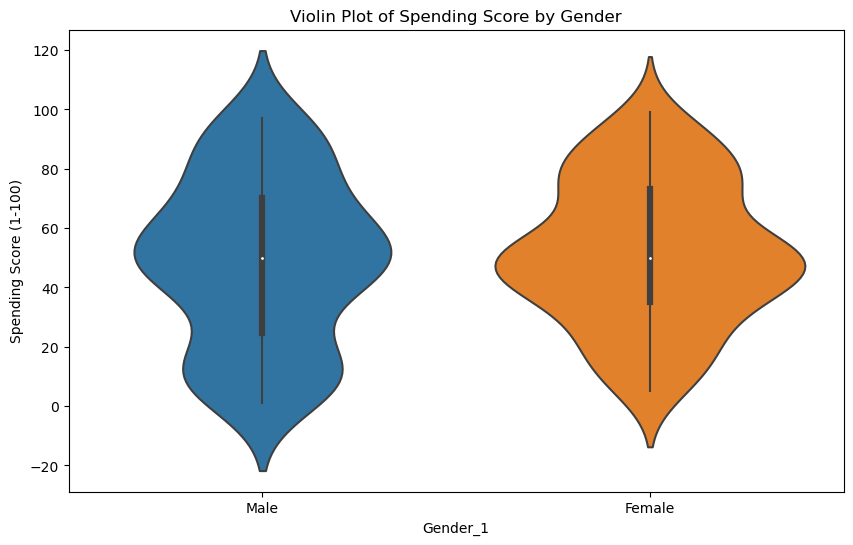

In [134]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender_1', y='Spending Score (1-100)', data=data)
plt.title('Violin Plot of Spending Score by Gender')
plt.xlabel('Gender_1')
plt.ylabel('Spending Score (1-100)')
plt.xticks([0, 1], ['Male', 'Female'])  # Replace 0 and 1 with Male and Female
plt.show()

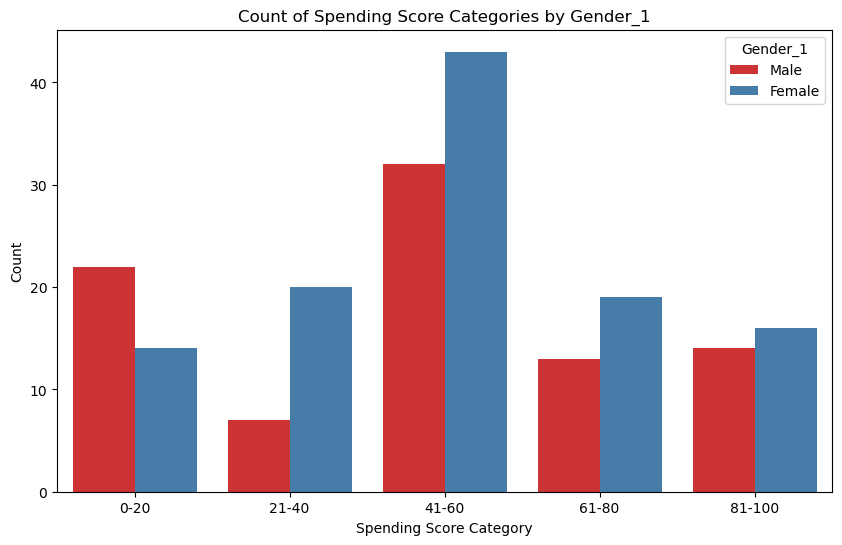

In [135]:
plt.figure(figsize=(10, 6))
data['Spending Score Category'] = pd.cut(data['Spending Score (1-100)'], bins=[0, 20, 40, 60, 80, 100], 
                                         labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
sns.countplot(x='Spending Score Category', hue='Gender_1', data=data, palette='Set1')
plt.title('Count of Spending Score Categories by Gender_1')
plt.xlabel('Spending Score Category')
plt.ylabel('Count')
plt.legend(title='Gender_1', labels=['Male', 'Female'])
plt.show()

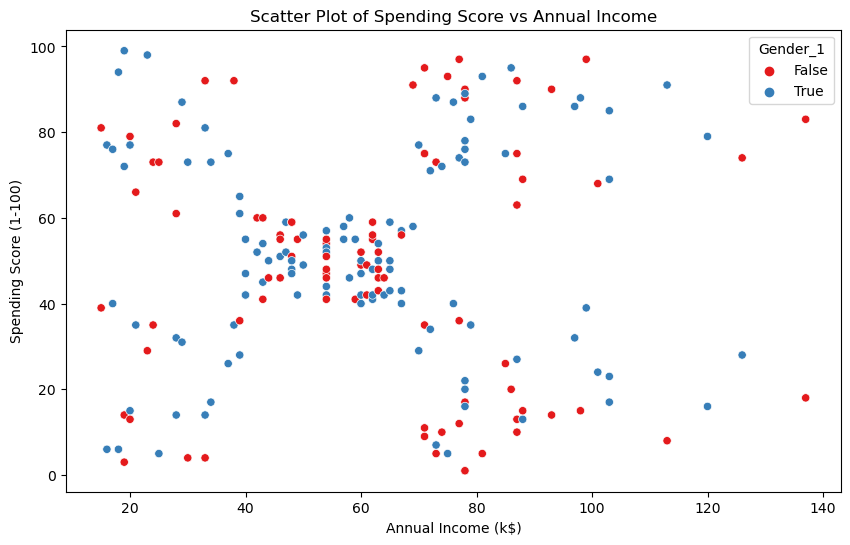

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender_1', palette='Set1')
plt.title('Scatter Plot of Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender_1')
plt.show()

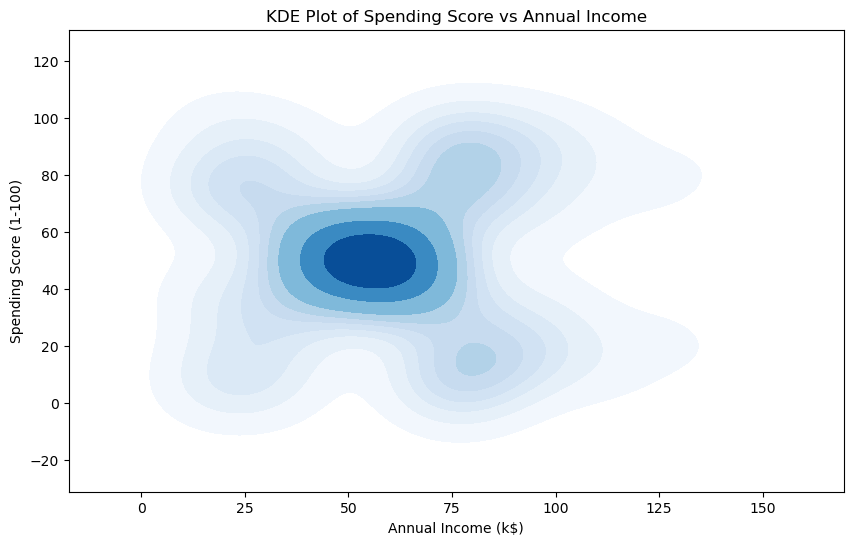

In [139]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', cmap='Blues', fill=True)
plt.title('KDE Plot of Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [140]:
# Applying KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Display the first few rows of the data with cluster labels
data.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Annual Income (Normalized),Gender_1,Cluster,Spending Score Category
0,1,19,15,39,-1.738999,False,4,21-40
1,2,21,15,81,-1.738999,False,2,81-100
2,3,20,16,6,-1.700830,True,4,0-20
3,4,23,16,77,-1.700830,True,2,61-80
4,5,31,17,40,-1.662660,True,4,21-40


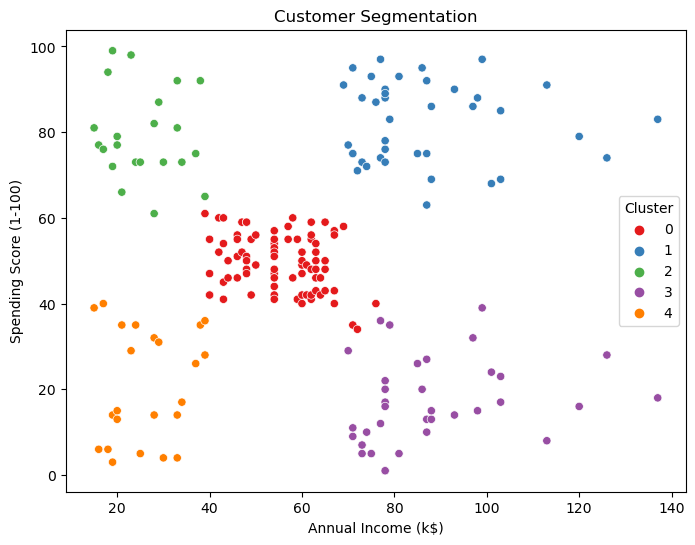

In [141]:
# Visualizing the clusters formed by KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segmentation')
plt.show()


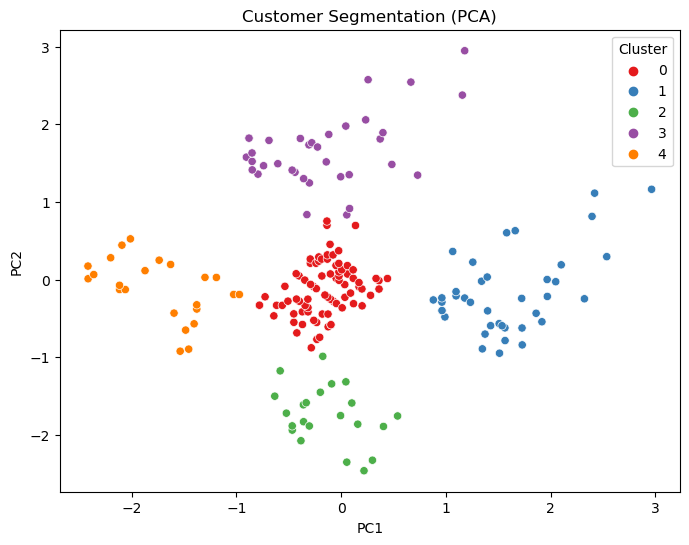

In [142]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Convert the PCA result to a DataFrame
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca['Cluster'] = clusters

# Plot the clusters in the PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_pca, palette='Set1')
plt.title('Customer Segmentation (PCA)')
plt.show()


In [144]:
import pandas as pd

print(data.dtypes)
data['Cluster'] = data['Cluster'].astype(int)  



CustomerID                       int64
Age                              int64
Annual Income (k$)               int64
Spending Score (1-100)           int64
Annual Income (Normalized)     float64
Gender_1                          bool
Cluster                          int32
Spending Score Category       category
dtype: object


In [145]:
data['Cluster'] = data['Cluster'].astype(int)

In [146]:
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)

print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
1        162.000000  32.692308           86.538462               82.128205   
2         23.090909  25.272727           25.727273               79.363636   
3        164.371429  41.114286           88.200000               17.114286   
4         23.000000  45.217391           26.304348               20.913043   

         Annual Income (Normalized)  Gender_1  
Cluster                                        
0                         -0.200913  0.592593  
1                          0.991583  0.538462  
2                         -1.329545  0.590909  
3                          1.055003  0.457143  
4                         -1.307519  0.608696  


In [149]:
# Save the clustered data to a CSV file
data.to_csv('customer_segmentation_clusters.csv', index=False)


Cluster Summary Statistics:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
1        162.000000  32.692308           86.538462               82.128205   
2         23.090909  25.272727           25.727273               79.363636   
3        164.371429  41.114286           88.200000               17.114286   
4         23.000000  45.217391           26.304348               20.913043   

         Gender_1  
Cluster            
0        0.592593  
1        0.538462  
2        0.590909  
3        0.457143  
4        0.608696  


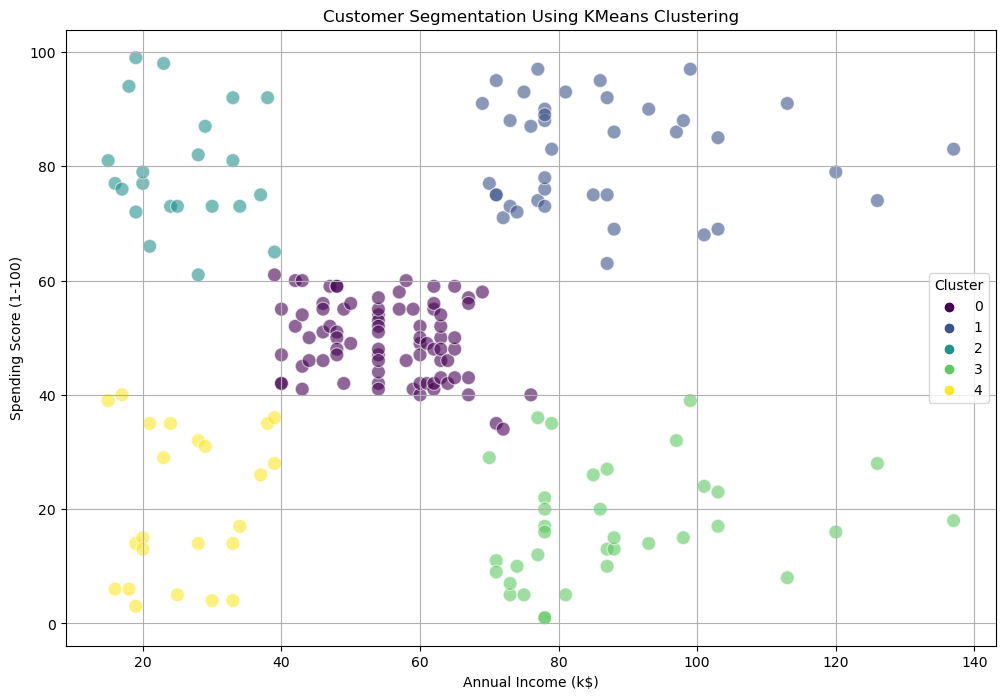


Data with Cluster Assignments:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_1  \
0           1   19                  15                      39         0   
1           2   21                  15                      81         0   
2           3   20                  16                       6         1   
3           4   23                  16                      77         1   
4           5   31                  17                      40         1   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\sara\Desktop\Mall_Customers.csv")  # Use your dataset path

# Data preprocessing
data['Gender_1'] = data['Gender'].map({'Male': 0, 'Female': 1})
data.drop('Gender', axis=1, inplace=True)

# Select relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster summary statistics
cluster_summary = data.groupby('Cluster').mean()
print("Cluster Summary Statistics:")
print(cluster_summary)

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', 
                palette='viridis', data=data, s=100, alpha=0.6)
plt.title('Customer Segmentation Using KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Optional: Display the first few rows with cluster assignments
print("\nData with Cluster Assignments:")
print(data.head())
